In [1]:
import sys
sys.path.insert(0, '../')
from utils.GraphAnalytics import GraphAnalytics
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
g = GraphAnalytics()
g.load_graph('../data/full_graph')

In [3]:
ccs = g.clustering_coef.values()

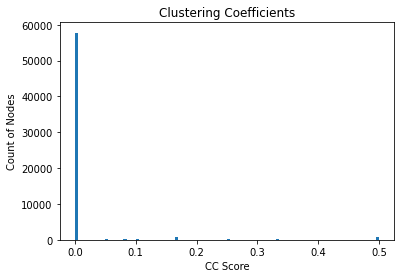

In [26]:
plt.hist(ccs, bins = 100)
title = "Clustering Coefficients"
plt.title(title)
plt.xlabel('CC Score')
plt.ylabel('Count of Nodes')
plt.savefig(f"{title}.png")
plt.show()

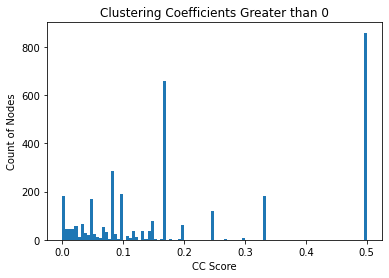

In [27]:
plt.hist([_ for _ in ccs if _ != 0], bins = 100)
title = "Clustering Coefficients Greater than 0"
plt.title(title)
plt.xlabel('CC Score')
plt.ylabel('Count of Nodes')
plt.savefig(f"{title}.png")
plt.show()

In [5]:
df = pd.DataFrame(Counter(list(ccs)), index=[0]).transpose().reset_index().rename({0:'cc_count','index':'cc_value'}, axis=1)
df.sort_values('cc_value',inplace=True)
df['cumsum'] = df.cc_count.cumsum()/df.cc_count.sum()
df

,cc_value,cc_count,cumsum
3,0.000000,57583,0.943581
193,0.000003,1,0.943598
150,0.000003,1,0.943614
149,0.000004,1,0.943631
148,0.000004,1,0.943647
...,...,...,...
135,0.266667,4,0.982811
54,0.300000,6,0.982909
14,0.333333,182,0.985891
133,0.350000,1,0.985908


In [6]:
edges = dict(g.degree)
edges_ls = sorted(list(edges.values()))

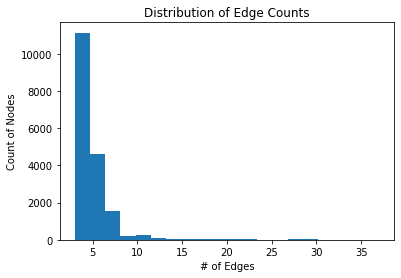

In [22]:
st= 99
st /= (st+1)
plt.hist(edges_ls[:int(st * len(edges_ls))], bins= 20)
title = "Distribution of Edge Counts"
plt.title(title)
plt.xlabel('# of Edges')
plt.ylabel('Count of Nodes')
plt.savefig(f"{title}.png")
plt.show()

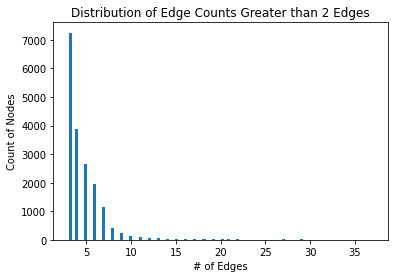

In [23]:
edges_ls = [_ for _ in edges_ls if _ not in (1,2)]
plt.hist(edges_ls[:int(st * len(edges_ls))], bins= 100)
title = "Distribution of Edge Counts Greater than 2 Edges"
plt.title(title)
plt.xlabel('# of Edges')
plt.ylabel('Count of Nodes')
plt.savefig(f"{title}.png")
plt.show()

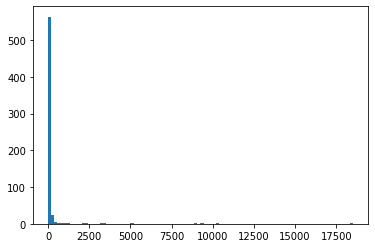

In [9]:
edges_ls = sorted(list(edges.values()))
plt.hist(edges_ls[int(st * len(edges_ls)):], bins= 100)
plt.show()

In [10]:
df = pd.DataFrame(Counter(edges_ls), index=[1]).transpose().rename({1:'count'}, axis=1)
df['cumsum'] = df.cumsum()/df.sum()
df

,count,cumsum
1,30931,0.506850
2,11730,0.699063
3,7249,0.817848
4,3878,0.881395
5,2642,0.924688
...,...,...
5067,1,0.999934
8946,1,0.999951
9330,1,0.999967
10358,1,0.999984


<AxesSubplot:>

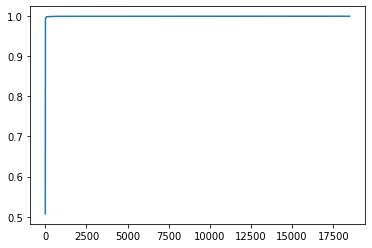

In [11]:
df['cumsum'].plot()

In [12]:
g.transitivity

0.008011159993884935

In [13]:
g.triangles

{0: 5,
 21966: 21,
 3: 3,
 2280: 0,
 35934: 1,
 1102: 5,
 25: 0,
 47853: 2,
 30: 0,
 32: 0,
 24154: 18,
 35: 0,
 35662: 9,
 37: 0,
 94: 0,
 115: 0,
 150: 3,
 48381: 3,
 159: 0,
 184: 0,
 218: 1,
 620: 1,
 219: 6,
 2055: 2,
 222: 2,
 1839: 8,
 241: 2,
 45353: 130,
 243: 1,
 284: 9,
 264: 0,
 20099: 0,
 282: 0,
 298: 3,
 1016: 18,
 306: 2,
 943: 6,
 309: 1,
 685: 3,
 323: 1,
 348: 2,
 818: 19,
 361: 0,
 45721: 10,
 366: 1,
 368: 1,
 392: 1,
 400: 1,
 404: 2,
 405: 1,
 833: 6,
 406: 1,
 1871: 1,
 419: 1,
 677: 8,
 444: 2,
 2199: 2,
 449: 2,
 631: 3,
 456: 2,
 486: 2,
 460: 0,
 462: 2,
 517: 3,
 470: 2,
 2047: 14,
 485: 1,
 7107: 3,
 500: 0,
 514: 2,
 525: 2,
 769: 2,
 527: 2,
 17905: 4,
 539: 6,
 2035: 3,
 1533: 9,
 555: 1,
 1004: 3,
 560: 0,
 569: 1,
 1867: 1,
 607: 1,
 614: 1,
 1313: 9,
 1246: 2,
 636: 4,
 782: 2,
 801: 1,
 647: 1,
 2108: 2,
 659: 1,
 667: 0,
 8307: 2,
 706: 2,
 732: 11,
 708: 1,
 713: 2,
 741: 1,
 637: 1,
 763: 0,
 773: 4,
 779: 3,
 1806: 4,
 783: 2,
 788: 4,
 35407: 2